# __Time Series Modeling:__ _Exploratory Data Analysis_

## ___Notebook 3:___ _Sample Analysis in Python_

_By: Trevor Rowland_ ([@dBCooper2](https://github.com/dBCooper2))

Evaluating the Distributions of Samples using different estimators, transformations and plots.

## _References_

Normal Distribution Dataset - https://seattlecentral.edu/qelp/sets/057/057.html

## _Table of Contents_

## Accessing Data:

Here are the necessary Libraries for this notebook:

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from KDEpy import FFTKDE
import matplotlib.pyplot as plt
import seaborn as sns

This notebook will use ASML's daily price data over the last 5 years as the data to inspect.

In [3]:
asml_df = pd.read_csv('/Users/dB/Documents/repos/github/pythonic-finance/docs/semiconductor_csvs/ASML/ASML_Candles_Daily.CSV')

asml_df = asml_df.filter(['Date', 'Adj Close'])
asml_df = asml_df.rename(columns={'Adj Close': 'Adj_Close'})
asml_df.set_index('Date', inplace=True)

asml_df.head()

,Adj_Close
Date,
2019-01-25,167.524933
2019-01-28,165.144684
2019-01-29,165.580917
2019-01-30,168.027512
2019-01-31,165.979218


## Computing the Sample CDF

The Sample CDF is similar to a probability distribution function(PDF), or a probability mass function like the ones described in MATH 3470. It describes a probability mass for all values $Y_i \leq y$ instead of $Y_i = y$.

Recall from the textbook notes that the Sample Cumulative Distribution Function(CDF) can be expressed as a function $F_n(y)$:

$$F_n(y) = \frac{\sum_{i=1}^{n}I\{Y_i \leq y\}}{n}$$

In this formula, $I$ is the indicator function, which means that $I\{Y_i\leq y\}=1$ when $Y_i \leq y$, and $I=0$ otherwise.

## Computing Sample Quantiles

To compare the distribution of returns to the raw prices, the log returns of ASML need to be calculated:

In [4]:
asml_df['Log_Returns'] = np.log(asml_df['Adj_Close'] / asml_df['Adj_Close'].shift(1))
asml_df.head()

,Adj_Close,Log_Returns
Date,,
2019-01-25,167.524933,NaN
2019-01-28,165.144684,-0.014310
2019-01-29,165.580917,0.002638
2019-01-30,168.027512,0.014668
2019-01-31,165.979218,-0.012265


Now the quantiles can be found using pandas's built-in quantiles() function:

In [11]:
price_quantile_list = []
returns_quantile_list = []

i=0
while i<100:
    price_quantile_list.append(asml_df['Adj_Close'].quantile(i*.01))
    returns_quantile_list.append(asml_df['Log_Returns'].quantile(i*.01))
    i+=1

And finally, the quantiles should be placed into a Quantile DataFrame:

In [12]:
quantiles_df = pd.DataFrame()

quantiles_df['percentile'] = np.arange(0,1, .01)
quantiles_df['price'] = price_quantile_list
quantiles_df['log_returns'] = returns_quantile_list

quantiles_df

,percentile,price,log_returns
0,0.00,165.144684,-0.190545
1,0.01,171.767194,-0.062494
2,0.02,174.608240,-0.056159
3,0.03,177.901868,-0.049317
4,0.04,182.569967,-0.045006
...,...,...,...
95,0.95,774.368994,0.039615
96,0.96,784.292856,0.041645
97,0.97,792.994333,0.048561
98,0.98,820.974248,0.052721


### _Computing the Central Limit Theorem for Sample Quantiles_

When this is covered in MATH 3470 I will come back and revisit this, for now it is beyond my understanding and not necessary for the project.

### _Normal Probability Plots_

Normal Probability plots as a visualization to see how 'normal' a distribution is. Recall from the textbook notes that a linear relationship with the normal distribution indicates the sample is normally distributed.

The normal distribution sample used is [QELP's Data Set #057](https://seattlecentral.edu/qelp/sets/057/057.html), and is a normal distribution of the length of housefly wings. The samples will be plotted against this and tested for normality.

Here is the code to import the normal distribution, compute its quantiles, and plot it against the ASML data.

__Importing the Normal Distribution:__

In [14]:
path = '/Users/dB/Documents/repos/github/pythonic-finance/docs/test_distributions/s057_normal_dist.csv'
normdist_df = pd.read_csv(path)
normdist_df.head()

,Value
0,36
1,37
2,38
3,38
4,39


__Computing the Quantiles of the Normal Distribution:__

In [34]:
normdist_quantile_list = list()
i=0
while i<100:
    normdist_quantile_list.append(normdist_df['Value'].quantile(i*.01))
    i+=1

quantiles_df['normal_distribution'] = normdist_quantile_list
quantiles_df['norm_dist2'] = normdist_quantile_list

quantiles_df.head()

,percentile,price,log_returns,normal_distribution,norm_dist2
0,0.00,165.144684,-0.190545,36.00,36.00
1,0.01,171.767194,-0.062494,36.99,36.99
2,0.02,174.608240,-0.056159,37.98,37.98
3,0.03,177.901868,-0.049317,38.00,38.00
4,0.04,182.569967,-0.045006,38.96,38.96


__Plotting the Normal Probability Plots:__

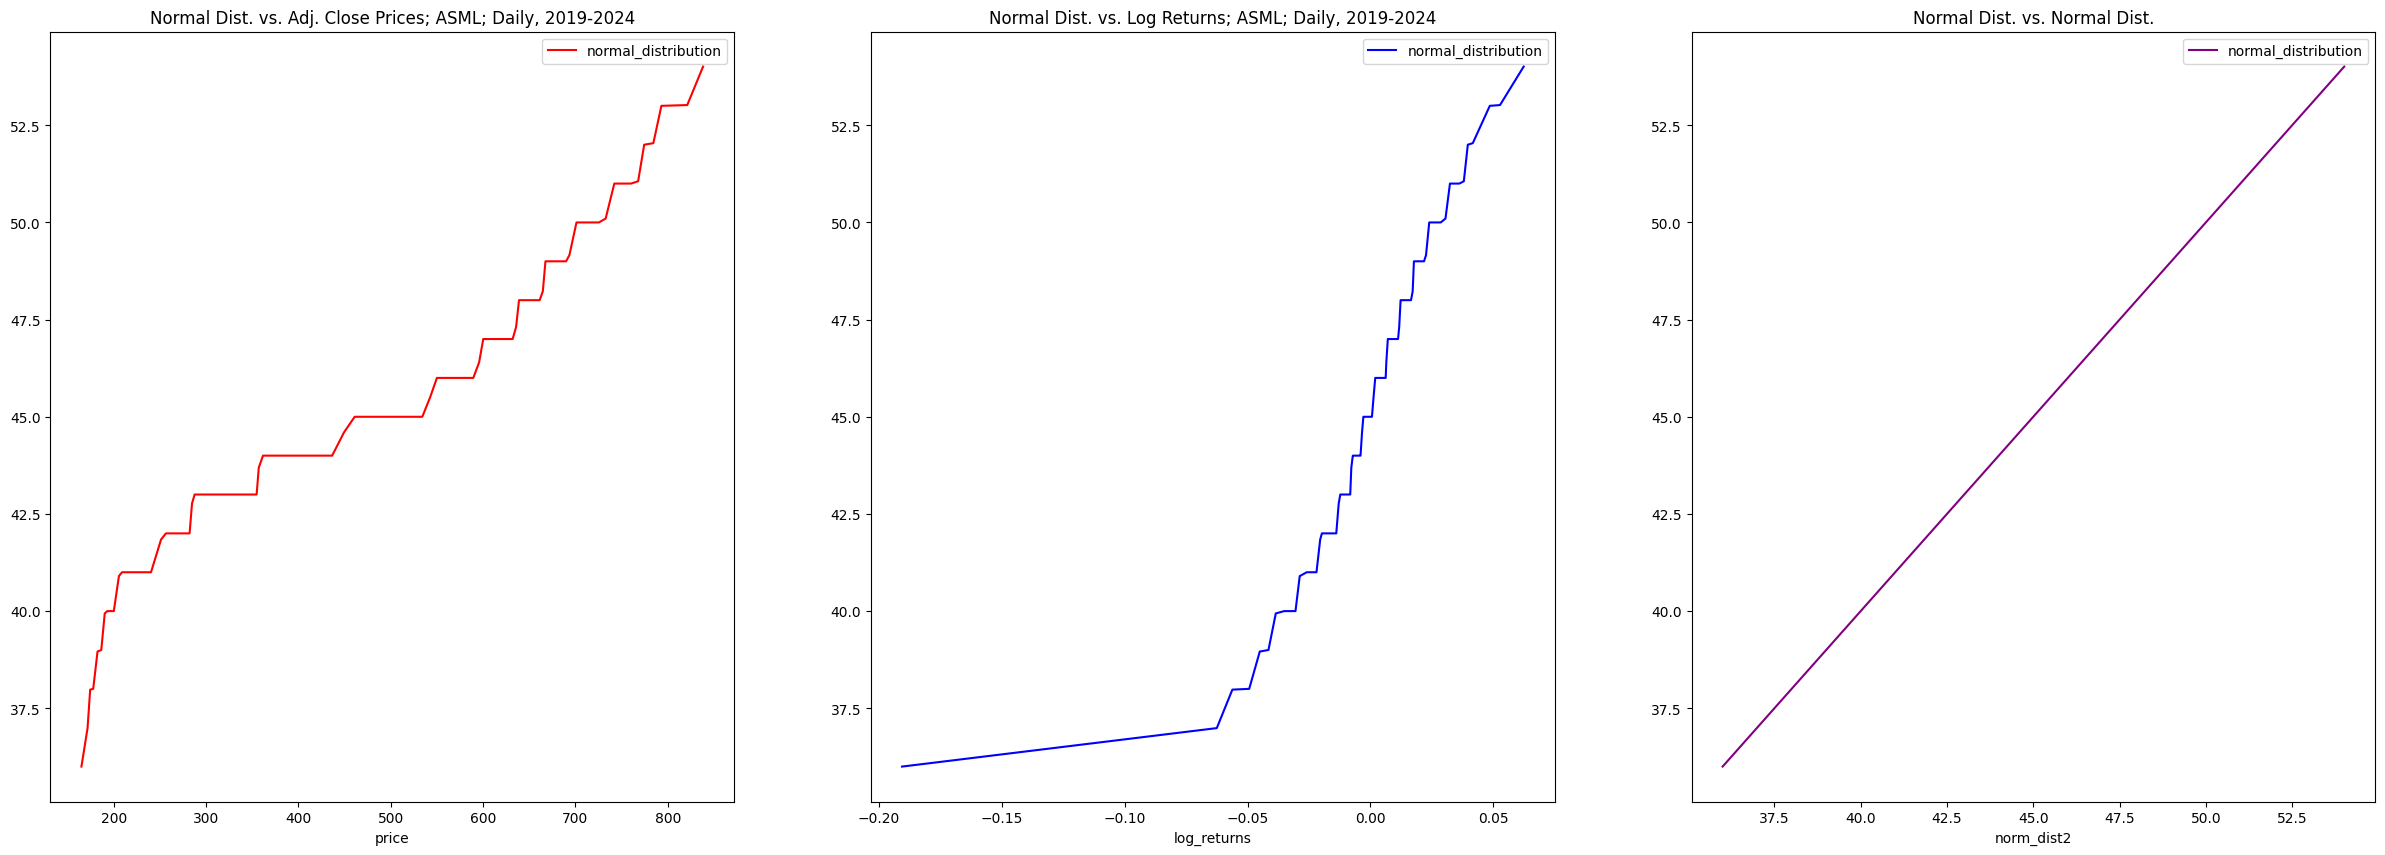

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10), squeeze=False)

axs[0][0].set_title('Normal Dist. vs. Adj. Close Prices; ASML; Daily, 2019-2024')
axs[0][1].set_title('Normal Dist. vs. Log Returns; ASML; Daily, 2019-2024')
axs[0][2].set_title('Normal Dist. vs. Normal Dist.')

quantiles_df.plot(x='price', y='normal_distribution', ax=axs[0][0], color = 'red')
quantiles_df.plot(x='log_returns', y='normal_distribution', ax=axs[0][1], color = 'blue')
quantiles_df.plot(x='norm_dist2', y='normal_distribution', ax=axs[0][2], color = 'purple')

plt.show()

From left to right, the Graphs shown are the Price Data vs. the Normal Distribution, the Log Returns vs. the Normal Distribution, and a Normal Distribution vs a Normal Distribution as a reference.

From Fig. 4.9 from the textbook, these graphs can be interpreted as concave-convex, convex and linear, respectively.

For the raw price data, the Normal Probability plot indicate that the price data sample has lighter tails than the normal distribution sample. This means the data is more concentrated towards the mean.

For the log returns, the Normal Probability plot indicates that the log return sample has left-skewness, which means the mean is to the left of the median. This can quickly be checked:

In [36]:
mean = np.mean(quantiles_df['log_returns'])
med = np.median(quantiles_df['log_returns'])

print(f'Mean: {mean}\nMedian: {med}')

Mean: -0.000666329723885859
Median: 0.0009432665034137581


This is true, proving the left-skewness of the sample.

### _Half-Normal Plots_

Now the samples must be checked for outliers. The Half-Normal plot is a measure that can test for outliers, and is done by plotting the absolute deviations from the mean against the normal distribution.

__Computing the Absolute Deviations:__

In [44]:
quantiles_df['price_devs'] = np.abs(quantiles_df.price - np.mean(quantiles_df.price))
quantiles_df['lr_devs'] = np.abs(quantiles_df.log_returns - np.mean(quantiles_df.log_returns))

quantiles_df.head()

,percentile,price,log_returns,normal_distribution,norm_dist2,price_devs,lr_devs
0,0.00,165.144684,-0.190545,36.00,36.00,326.353490,0.189879
1,0.01,171.767194,-0.062494,36.99,36.99,319.730981,0.061827
2,0.02,174.608240,-0.056159,37.98,37.98,316.889934,0.055492
3,0.03,177.901868,-0.049317,38.00,38.00,313.596306,0.048651
4,0.04,182.569967,-0.045006,38.96,38.96,308.928207,0.044340


__Creating a Half-Normal Distribution to Plot Against__

The half-normal distribution is a normal distribution where $y=0 \forall x<=0$. This means that the normal distribution used needs to be re-centered around 0, and then converted to the half-normal:

In [52]:
## Centering the Distribution around 0:
half_normdist_df = pd.DataFrame()
half_normdist_df['values'] = normdist_df['Value'] - np.median(normdist_df['Value'])

for i in half_normdist_df.index:
    if half_normdist_df.loc[i, 'values'] <0:
        half_normdist_df.loc[i, 'values'] = 0

half_normdist_df

,values
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,6.5
96,7.5
97,7.5
98,8.5


__Adding the Half-Normal Distribution Quantiles to the Quantile DataFrame__

In [67]:
half_normdist_quantile_list = list()
i=0
while i<100:
    half_normdist_quantile_list.append(half_normdist_df['values'].quantile(i*.01))
    i+=1

quantiles_df['half_normal_distribution'] = half_normdist_quantile_list
quantiles_df['hn2'] = half_normdist_quantile_list # dummy half-normal for plots

__Plotting the Half-Normal Plots__

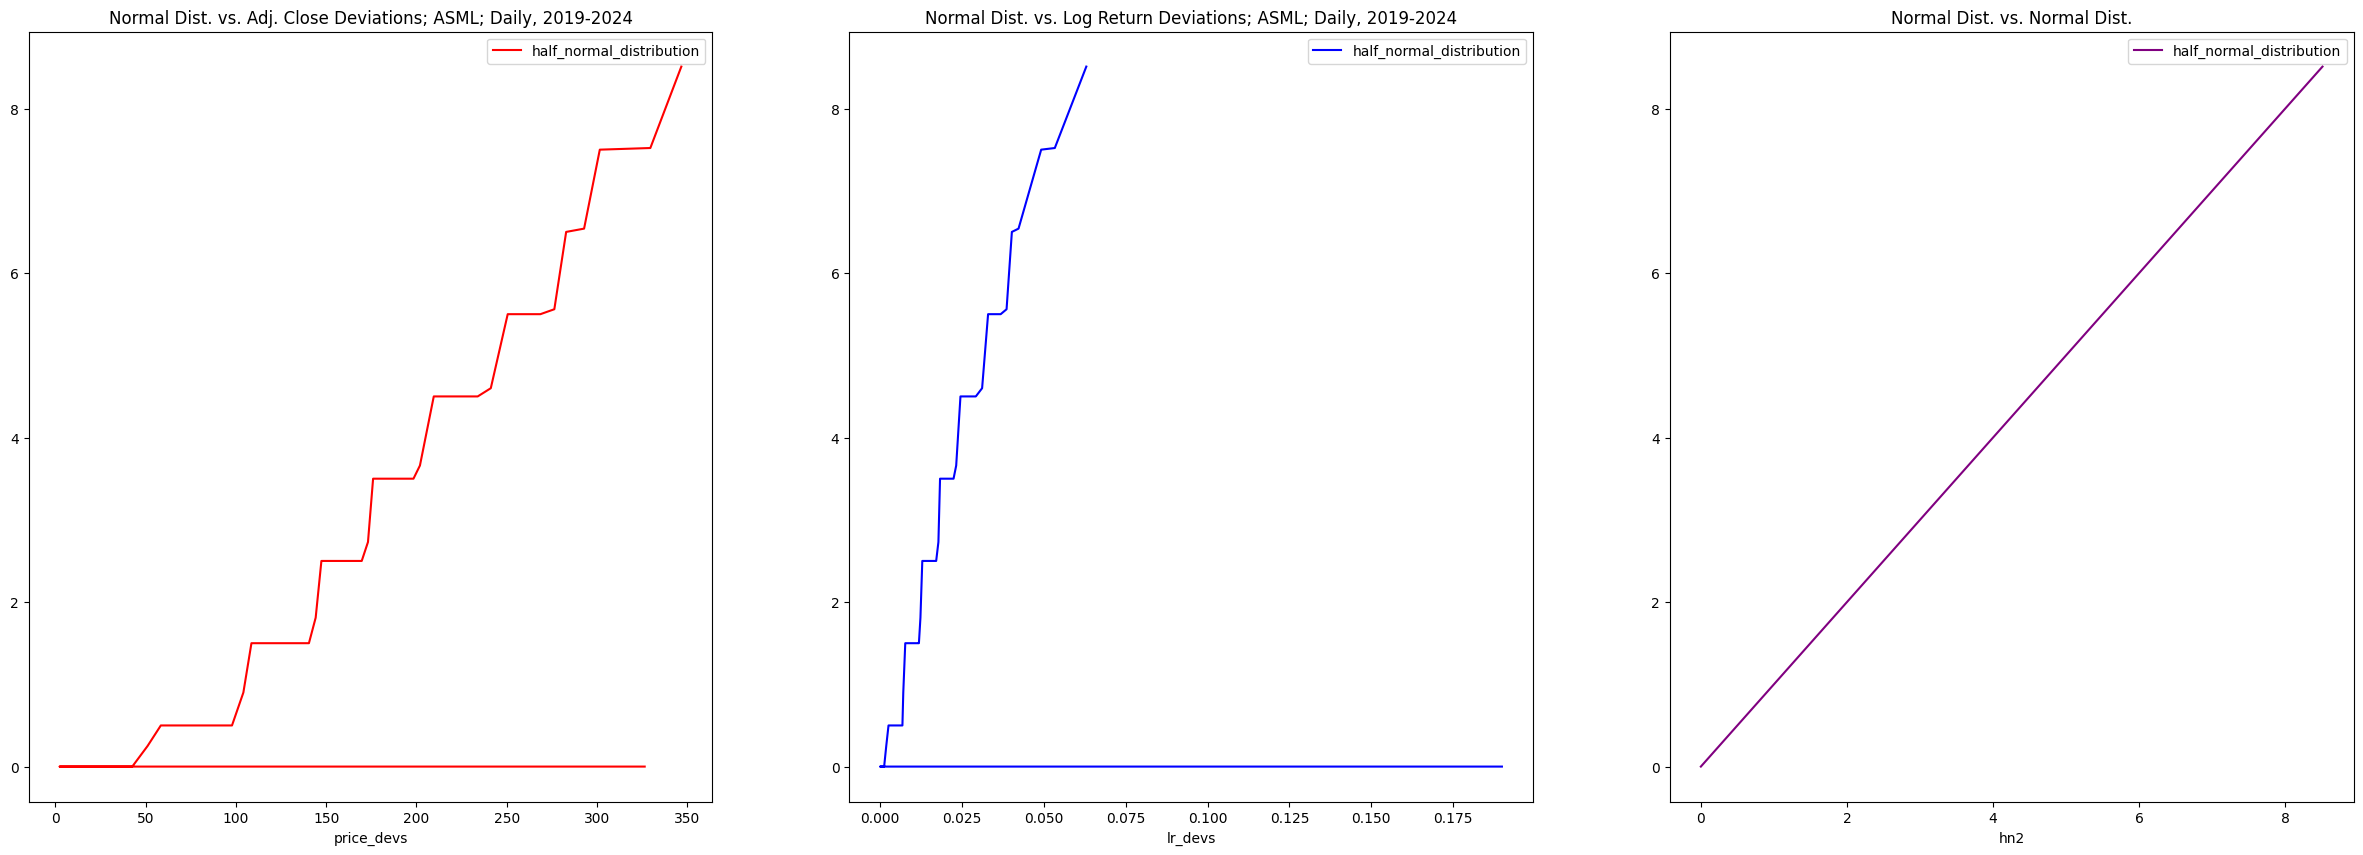

In [69]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10), squeeze=False)

axs[0][0].set_title('Normal Dist. vs. Adj. Close Deviations; ASML; Daily, 2019-2024')
axs[0][1].set_title('Normal Dist. vs. Log Return Deviations; ASML; Daily, 2019-2024')
axs[0][2].set_title('Normal Dist. vs. Normal Dist.')

quantiles_df.plot(x='price_devs', y='half_normal_distribution', ax=axs[0][0], color = 'red')
quantiles_df.plot(x='lr_devs', y='half_normal_distribution', ax=axs[0][1], color = 'blue')
quantiles_df.plot(x='hn2', y='half_normal_distribution', ax=axs[0][2], color = 'purple')

plt.show()

These are the half-normal plots of the price, log returns and an example plot of the half-normal distribution plotted against itself. Again, the left skewness of the log returns appears, and the mostly linear nature of both plots indicates that there are no significant outliers in either sample.

### _Quantile-Quantile Plots_

The Normal Probability Plot and Half-Normal Plots are both special cases of the Quantile-Quantile Plot. For fun, here is the quantile-quantile plot of the prices vs the returns of ASML:

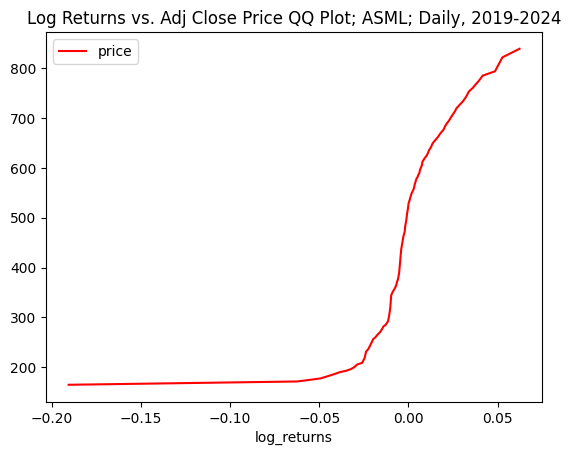

In [65]:
quantiles_df.plot(x='log_returns', y='price', color='red')

plt.title('Log Returns vs. Adj Close Price QQ Plot; ASML; Daily, 2019-2024')
plt.show()

## Tests of Normality

Tests of normality can be done using the SciPy library. This library has the following functions:

- shapiro(): Shapiro-Wilks test

- jarque_bera(): Jarque-Bera test

- cramervonmises(): Cramér-von Mises test

- kstest(): Kolmogorov-Smirnov test



In [70]:
from scipy.stats import shapiro, jarque_bera, cramervonmises, kstest

### _The Shapiro-Wilk Test_

The Shapiro-Wilk test checks to see if a sample is normally distributed.

Here are the results of the Shapiro-Wilks test on the Prices and Returns Samples:

In [77]:
print('Shapiro Wilks Test on Adjusted Closing Prices:')
print(shapiro(asml_df['Adj_Close']))

print('\nShapiro Wilks Test on Log Returns:')
print(shapiro(asml_df['Log_Returns'].dropna()))

Shapiro Wilks Test on Adjusted Closing Prices:
ShapiroResult(statistic=0.9353744110633965, pvalue=6.380826082962216e-23)

Shapiro Wilks Test on Log Returns:
ShapiroResult(statistic=0.9653840226374104, pvalue=9.75998195455898e-17)


These low p-values indicate that the distribution for both the prices and the log returns are not normally distributed.